#  This Jupyter Notebook contains the codes of various Euler Bernoulli Beam simulations From Sauer First Edition


## Constants definitions

In [1]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young�s modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)


## Both ends fixed

In [38]:
n = 1000; % number of subintervals on [0, L]
h = L/(n + 1); % discretization spacing

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(n, 1);

% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, n);
dp1 = dm1 = -4*ones(1, n-1);
dp2 = dm2 = ones(1, n-2);
% Fixed left end
d0(1) = 12.0; d0(2) = 6.0;
dp1(1) = -6.0;
dp2(1) = (4/3);
dm1(1) = -4.0;
dm2(1) = 1.0;

% Fixed right end; flipped sign
d0(n) = -12.0; d0(n-1) = 6.0;
dp1(n-1) = -4.0;
dp2(n-2) = 1.0;
dm1(n-1) = -6.0;
dm2(n-2) = (4/3);
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots
x = (h:h:L-h)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

ErrMax =   1.3682e-004


## Left Fixed, Right Free

In [29]:
n = 1000; % number of subintervals on [0, L]
h = L/(n + 1); % discretization spacing
%N = n + 1; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(n, 1);
%f(1) = f(N) = 0;


% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, n);
dp1 = dm1 = -4*ones(1, n-1);
dp2 = dm2 = ones(1, n-2);
% Fixed left end
d0(1) = 12.0; d0(2) = 6.0;
dp1(1) = -6.0;
dp2(1) = (4/3);
dm1(1) = -4.0;
dm2(1) = 1.0;

% Free right end
d0(n) = (12/25); 
d0(n-1) = (111/25);
dp1(n-1) = -(43/25);
dp2(n-2) = 1.0;
dm1(n-1) = -(24/25);
dm1(n-2) = (-93/25);
dm2(n-2) = (12/25);
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (h:h:L - h)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))

ErrMax =   3.3215e-006


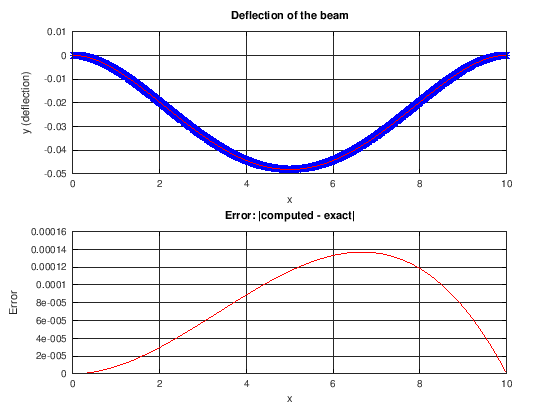

In [39]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

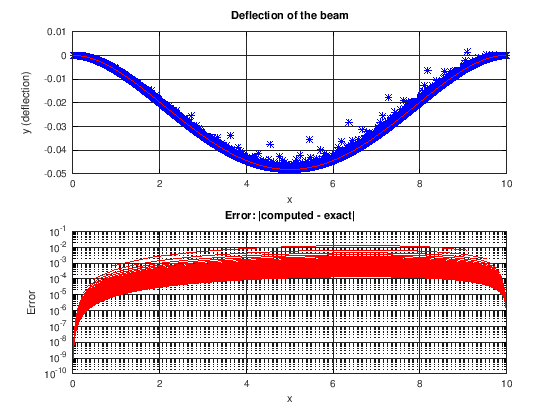

In [27]:

% vector that contains error values
ErrorsBothFixed = [];
n = 10; % number of subintervals on [0, L]
for i=1:100 
    h = L/(n + 1); % discretization spacing
    N = n; % number of unknowns to be solved for

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);

    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, N);
    dp1 = dm1 = -4*ones(1, N-1);
    dp2 = dm2 = ones(1, N-2);
    % Fixed left end
    d0(1) = 12.0; d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    dm1(1) = -4.0;
    dm2(1) = 1.0;

    % Fixed right end
    d0(N) = -12.0; d0(N-1) = 6.0;
    dp1(N-1) = -4.0;
    dp2(N-2) = 1.0;
    dm1(N-1) = -6.0;
    dm2(N-2) = (4/3);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    % Plots
    x = (h:h:L-h)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrorsBothFixed(i) = max(abs(y-y_exact));
    n = n + 10;
    
    subplot(2,1,1);
    plot(x, y, "b*", x, y_exact, "r")
    hold on
    title('Deflection of the beam');
    xlabel('x'); ylabel('y (deflection)');
    grid on;
    subplot(2,1,2);
    semilogy(x, abs(y - y_exact), "r")
    hold on
    title('Error: |computed - exact|');
    xlabel('x'); ylabel('Error');
    grid on;
endfor

ErrorsBothFixed = ErrorsBothFixed';

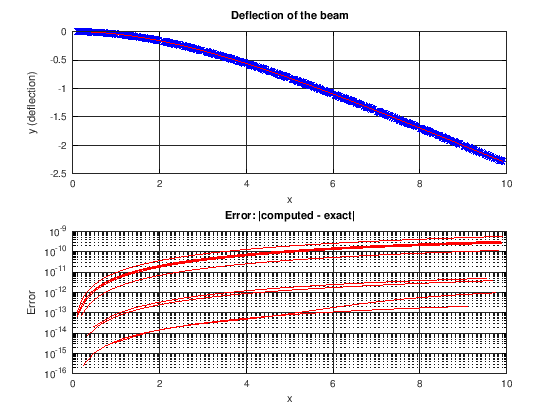

In [35]:

% vector that contains error values
ErrorsLeftFixedRightFree = [];
n = 10; % number of subintervals on [0, L]

    
    
for i=1:10 
    %N = n + 1; % number of unknowns to be solved for
    h = L/(n+1); % discretization spacing

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(n, 1);
    %f(1) = f(N) = 0;


    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, n);
    dp1 = dm1 = -4*ones(1, n-1);
    dp2 = dm2 = ones(1, n-2);
    % Fixed left end
    d0(1) = 12.0; d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    dm1(1) = -4.0;
    dm2(1) = 1.0;

    % Free right end
    d0(n) = (12/25); 
    d0(n-1) = (111/25);
    dp1(n-1) = -(43/25);
    dp2(n-2) = 1.0;
    dm1(n-1) = -(24/25);
    dm1(n-2) = (-93/25);
    dm2(n-2) = (12/25);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    % Plots

    x = (h:h:L - h)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
    ErrorsLeftFixedRightFree(i) = max(abs(y-y_exact));
    n = n + 10;

    
    subplot(2,1,1);
    plot(x, y, "b*", x, y_exact, "r")
    hold on
    title('Deflection of the beam');
    xlabel('x'); ylabel('y (deflection)');
    grid on;
    subplot(2,1,2);
    semilogy(x, abs(y - y_exact), "r")
    hold on
    title('Error: |computed - exact|');
    xlabel('x'); ylabel('Error');
    grid on;
endfor
ErrorsLeftFixedRightFree = ErrorsLeftFixedRightFree';

In [ ]:

% vector that contains error values
ErrorsBothFixed = [];
n = 10; % number of subintervals on [0, L]
for i=1:100 
    h = L/n; % discretization spacing
    N = n + 1; % number of unknowns to be solved for

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);
    f(1) = f(n) = 0;

    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, N);
    dp1 = dm1 = -4*ones(1, N-1);
    dp2 = dm2 = ones(1, N-2);
    % Fixed left end
    d0(1) = 12.0; d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    dm1(1) = -4.0;
    dm2(1) = 1.0;

    % Fixed right end
    d0(N) = 12.0; d0(N-1) = 6.0;
    dp1(N-1) = -4.0;
    dp2(N-2) = 1.0;
    dm1(N-1) = -6.0;
    dm2(N-2) = (4/3);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    
    % Plots

    x = (0:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrorsBothFixed(i) = max(abs(y-y_exact));
    n = n + 10;
    N = n + 1;
    
    subplot(2,1,1);
    plot(x, y, "b*", x, y_exact, "r")
    hold on
    title('Deflection of the beam');
    xlabel('x'); ylabel('y (deflection)');
    grid on;
    subplot(2,1,2);
    semilogy(x, abs(y - y_exact), "r")
    hold on
    title('Error: |computed - exact|');
    xlabel('x'); ylabel('Error');
    grid on;
endfor

ErrorsBothFixed = ErrorsBothFixed';

In [36]:
ErrorsLeftFixedRightFree

ErrorsLeftFixedRightFree =

  2.0695e-013
  4.9103e-012
  3.7992e-012
  9.6234e-013
  1.1652e-010
  2.7878e-010
  3.2773e-010
  2.9569e-010
  2.6635e-010
  5.6851e-010

